In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
cd /content/drive/My\ Drive/2017csb1072_Ass2/code

In [0]:
rm ../results_harris/*

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import img_as_float
from scipy.ndimage import convolve, gaussian_filter

In [0]:
base_path = "../data/"
img_name = ["toy_image.jpg", "bird.bmp", "dog.bmp", "einstein.bmp", "plane.bmp", "bicycle.bmp"]
thresh = [0.001, 0.05, 0.05, 0.1, 0.01, 0.1]

In [0]:
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = sobel_filter_x.T
m = 4 # Size of window

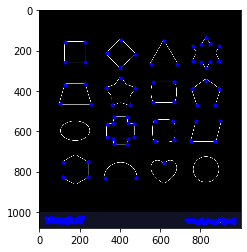

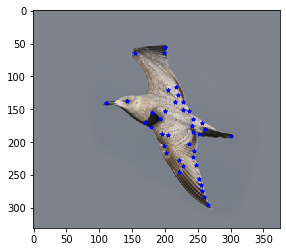

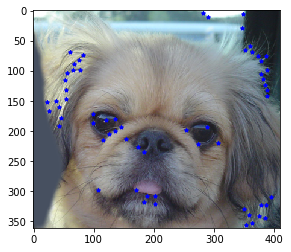

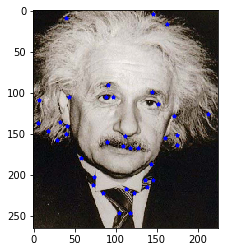

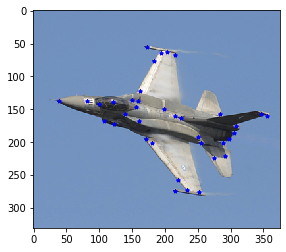

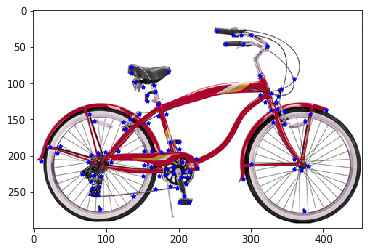

In [118]:
for img, th in zip(img_name, thresh):
    #Reading the image
    test_img_ = img_as_float(mpimg.imread(base_path + img))
    test_img = 0.299 * test_img_[:,:,0] + 0.587 * test_img_[:,:,1] + 0.114 * test_img_[:,:,2]
    test_img /= np.max(test_img)
    #Computing smoothed gradients
    fx_img = convolve(test_img, sobel_filter_x)
    fy_img = convolve(test_img, sobel_filter_y)
    corner_r = np.zeros(test_img.shape)
    l = []
    sq = (2*m+1)**2
    #Calculating corner response
    for i in range(len(test_img)):
        for j in range(len(test_img[i])):
            window_x, window_y = fx_img[i-m : i+m+1, j-m : j+m+1], fy_img[i-m:i+m+1, j-m:j+m+1]
            avg_xx, avg_xy, avg_yy = np.sum(window_x * window_x)/sq, np.sum(window_x * window_y)/sq, np.sum(window_y * window_y)/sq
            corner_r[i][j]= (avg_xx * avg_yy - avg_xy**2) - 0.04 * (avg_xx + avg_yy)**2

    t_ = th * np.amax(corner_r)

    for i in range(test_img.shape[0]):
        for j in range(test_img.shape[1]):
            if corner_r[i][j] >= t_:
                l.append((i, j, corner_r[i][j]))
    #Non-maximal suppression

    res_img = np.zeros(test_img.shape)
    l = sorted(l, key = lambda x: x[2], reverse=True)
    res_img[l[0][0]][l[0][1]] = 1
    x_intp, y_intp = [], []
    dist = 8
    for i in range(1, len(l)):
        f = 1
        for k in range(-dist, dist+1):
            for j in range(-dist, dist+1):
                u, v = l[i][0] + k, l[i][1] + j
                if u < 0 or u >= res_img.shape[0] or v < 0 or v >= res_img.shape[1]: continue
                if res_img[u][v] == 1:
                    f = 0
                    break
        if f: 
            res_img[l[i][0]][l[i][1]] = 1
            x_intp.append(l[i][0])
            y_intp.append(l[i][1])
    plt.imshow(test_img_, cmap='gray')
    plt.plot(y_intp, x_intp,'*', color='blue', markersize=4)
    plt.savefig('../results_harris/'+img.split('.')[0]+'1.jpg')
    plt.show()
#    mpimg.imsave('../results_harris/'+img.split('.')[0]+'.jpg', res_img, cmap='gray')

In [0]:
1